In [5]:
import operator

from sklearn.model_selection import train_test_split

import numpy as np
import scipy as sp
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import data
import statsmodels.api as sm


([<matplotlib.axis.XTick at 0x7f0d39ac2410>,
 [Text(0, 0, 'RMAD'), Text(1, 0, 'RCIW')])

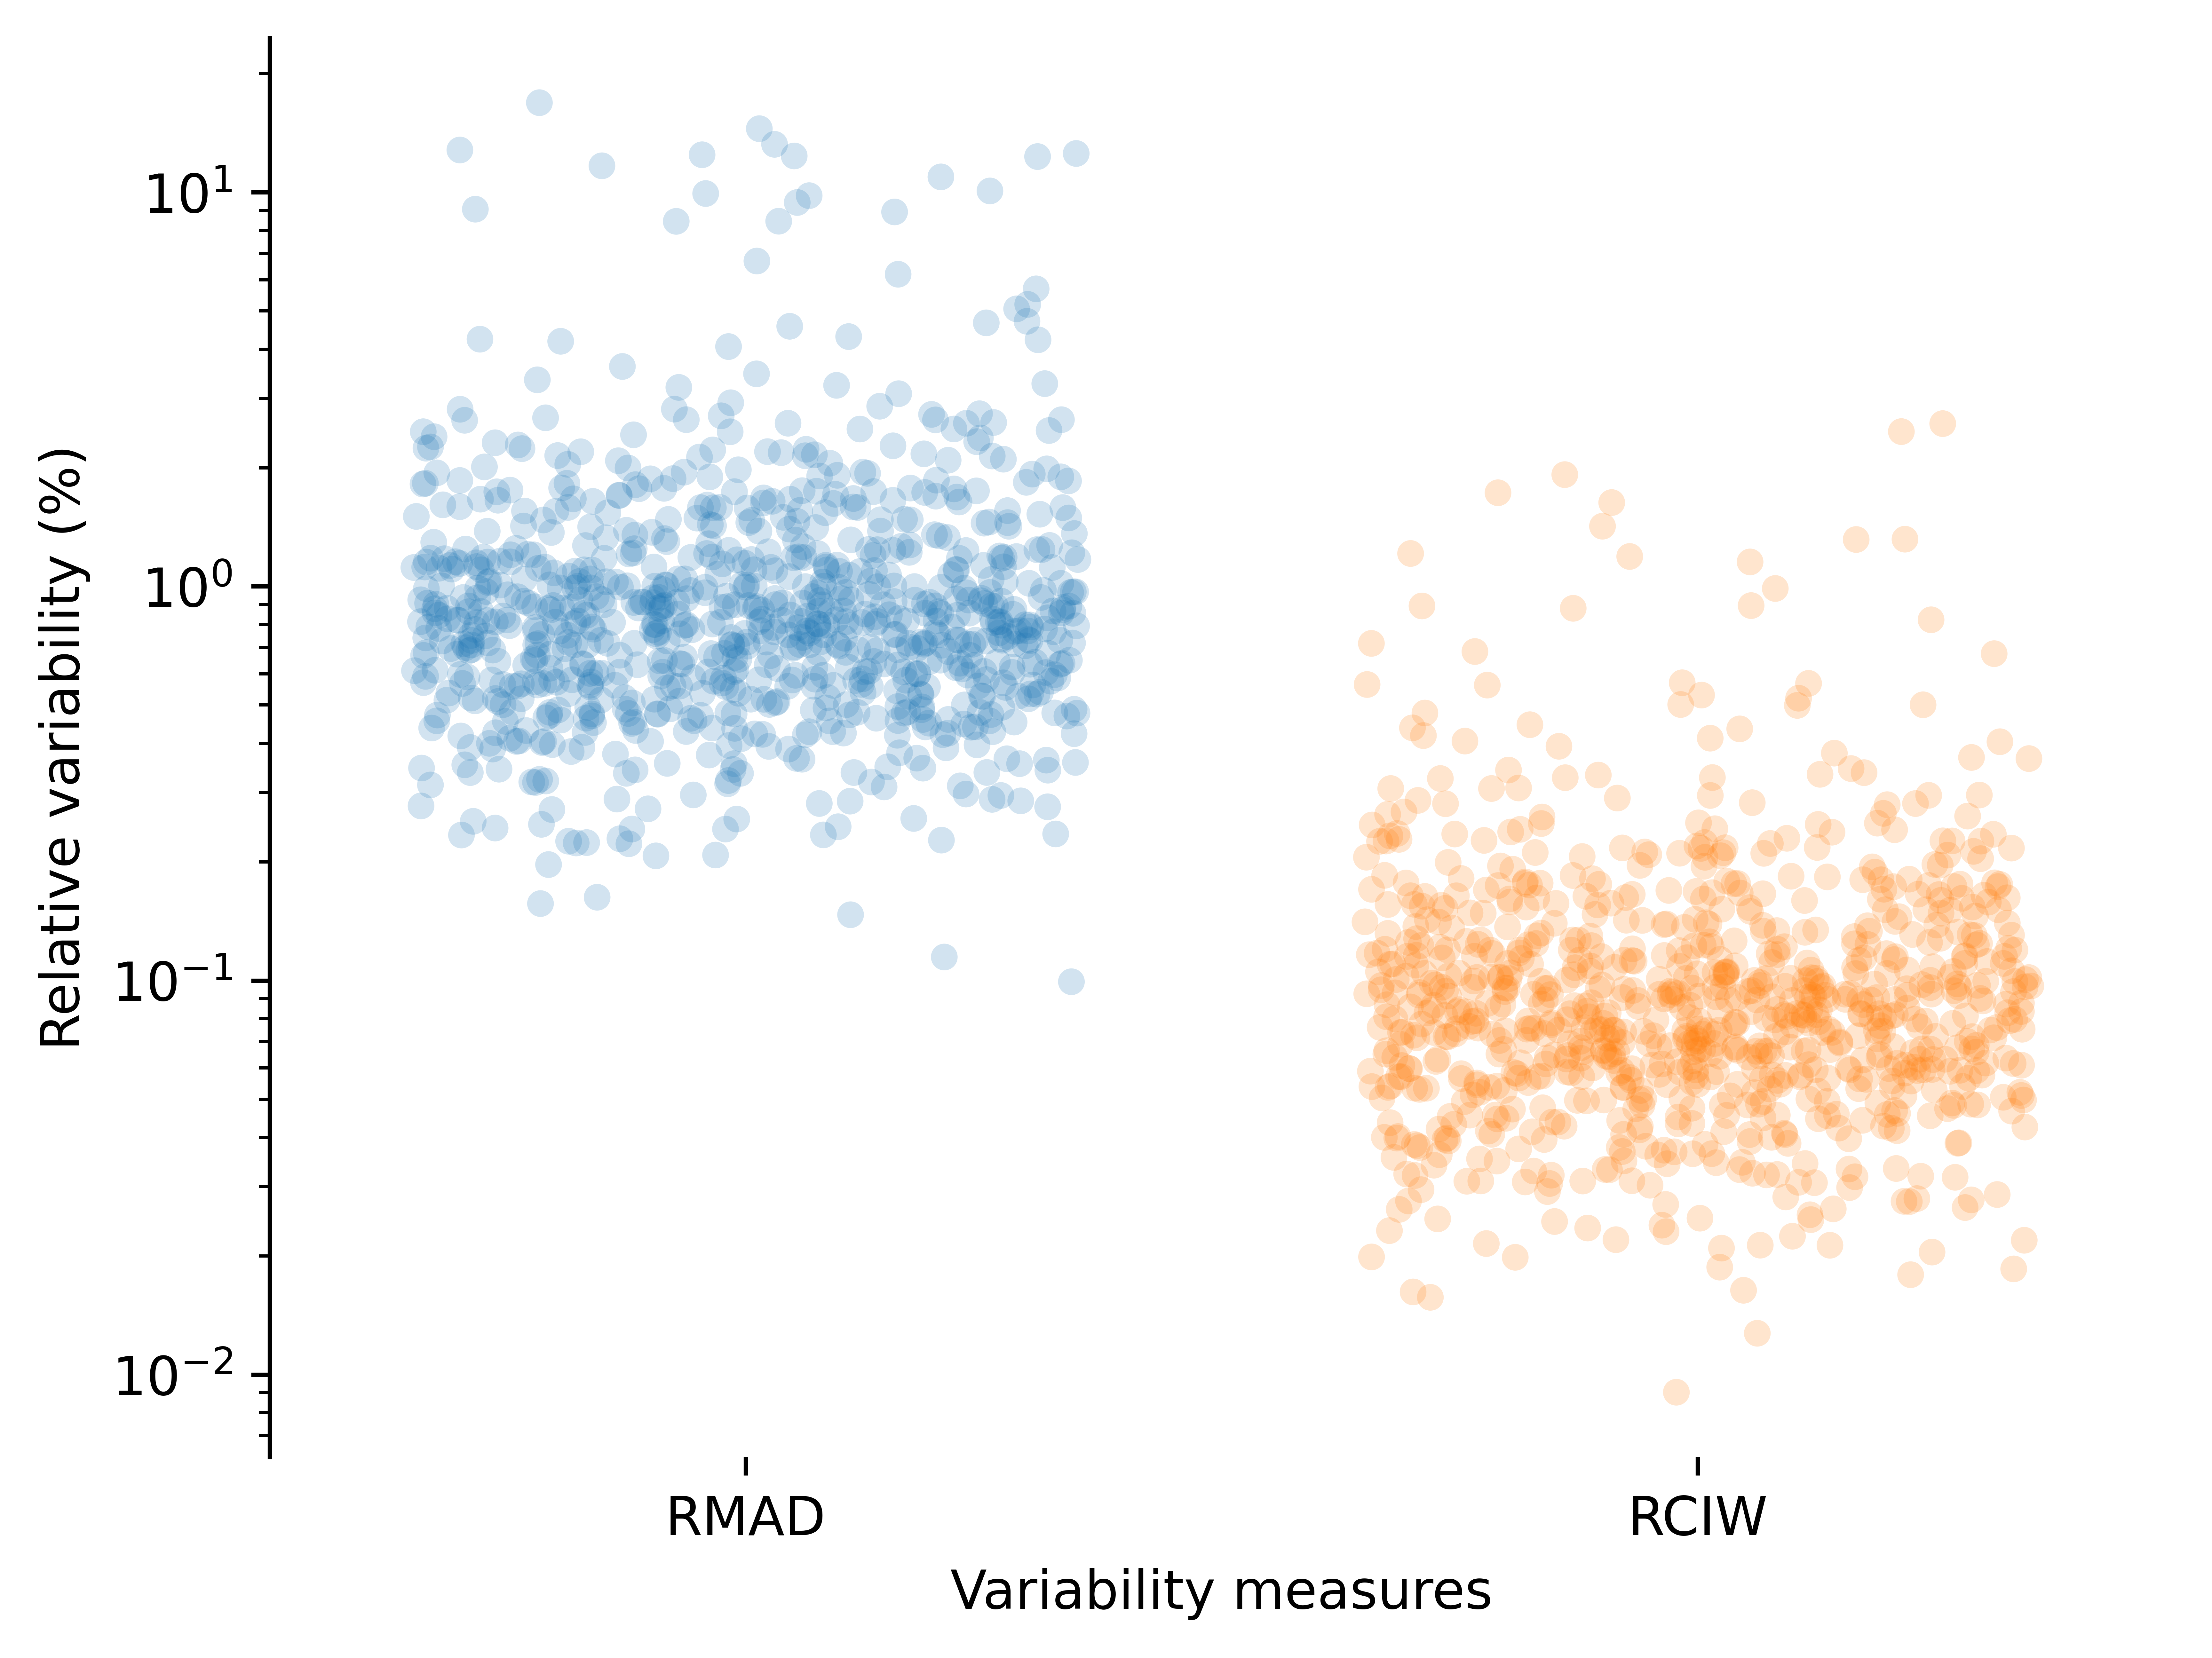

In [17]:
from data import plt_energies

# plt_energies('conf95.csv')
# sp.stats.normaltest(np.log10(y))
# print(y)
plt.figure(dpi=1200)
df = pd.read_csv('conf95.csv', delimiter=';')
# reader = csv.reader(file, delimiter=';')
# next(reader)
# array = numpy.array([[float(item) for item in row[1:]] for row in reader])
df = df.drop(columns=['bench', 'rciw_boot'])
df *= 100
stripplot = sns.stripplot(data=df, jitter=0.35, alpha=0.2)
sns.despine(bottom=True)
plt.yscale('log')
plt.xlabel("Variability measures")
plt.ylabel("Relative variability (%)")
plt.xticks(ticks=[0, 1], labels=['RMAD', 'RCIW'])


NormaltestResult(statistic=243.2704692322207, pvalue=1.4944755050949888e-53)

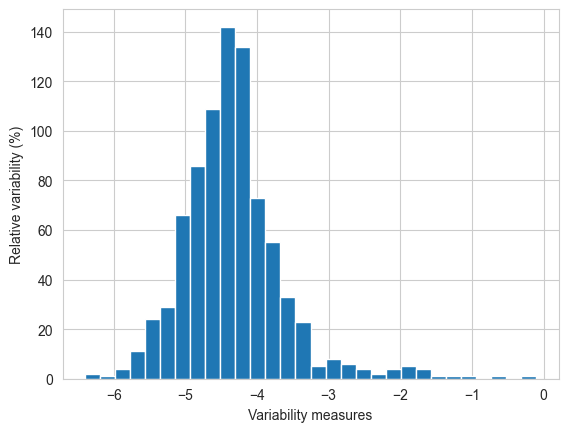

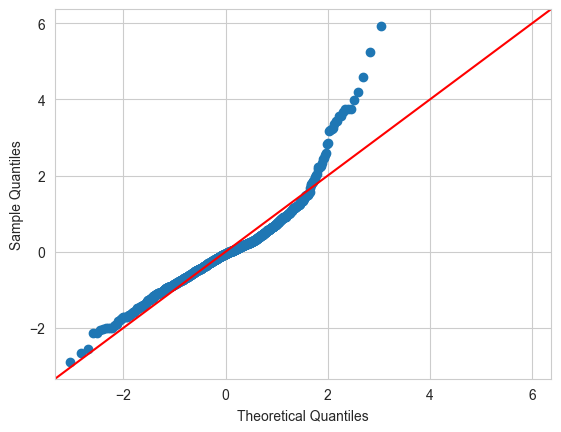

In [10]:
import math
from matplotlib.scale import LogScale

def reject_outliers(data):
    qs = sp.stats.mstats.hdquantiles(data, [0.25,0.5,0.75])
    irq = np.abs((qs[2] - qs[0]) * 2)
    dev = np.abs(data - qs[1])
    data = data[dev<irq]
    return np.array(list(filter(lambda n: n != math.nan, data)))
    

# def reject_outliers(data, m = 2.):
#     d = np.abs(data - np.median(data))
#     mdev = np.median(d)
#     s = d/mdev if mdev else np.zeros(len(d))
#     return data[s<m]

df = pd.read_csv('rmads.csv', delimiter=';')
# newdata = reject_outliers(df['rmad'])
# print(df['rmad'])
# d = np.log10(df['rmad'])
# stripplot = sns.stripplot(data=d, jitter=0.35, alpha=0.1)
# sns.despine(bottom=True)
# 
# data =df['rmad']
data =np.log(df['rmad'])
plt.xlabel("Variability measures")
plt.ylabel("Relative variability (%)")
plt.hist(data, bins=30)
sm.qqplot(data, line='45', fit=True)
sp.stats.normaltest(data, nan_policy='omit')

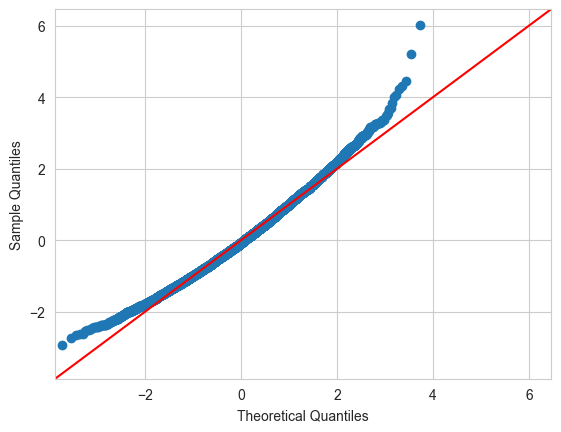

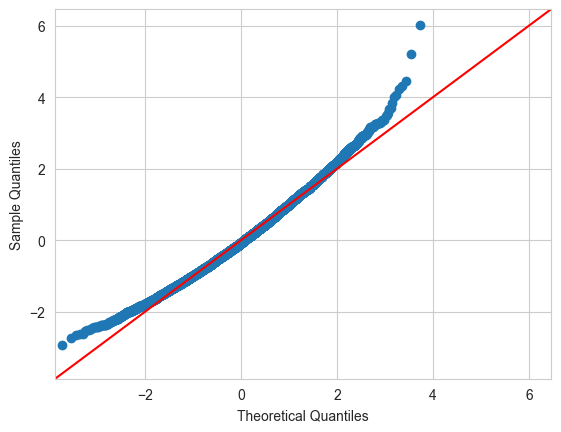

In [32]:
def boot(data, num_samples):
    bootstrap_means = np.zeros(num_samples)
    for i in range(num_samples):
     
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means[i] = bootstrap_mean
     
    estimated_mean = np.mean(bootstrap_means)
    estimated_std = np.std(bootstrap_means, ddof=1)
    return bootstrap_means

booted = boot(df['rmad'], 10000)
sm.qqplot(booted, line='45', fit=True)


In [ ]:
from pathlib import Path
from data import *

for consumption in list(collect_energy_data_paths())[:50]:
    #
    (proj, bench) = get_project_and_benchmark_from_consumption_path(consumption)
    #     # print(proj, bench)
    energy_files = get_energy_files_for_benchmark(proj, bench)
    #
    #     if not energy_files:
    #         continue  # if unable to find energy files, continue
    # energy_entries =pd.DataFrame({file: get_normalized_mj_from_file(Path(file)) for file in energy_files})
    # energy_entries = np.log10(energy_entries)
    # energy_entries = energy_entries.T.reset_index(drop=True).T
    # print(energy_entries)
    # plt.boxplot(energy_entries)
    # plt.ylim([10**-6, 10**-3])
    # meds = [custom_mquantiles_cimh_hd(iteration, 0.5, axis=0) for iteration in energy_entries]
    # meds = [custom_mquantiles_cimh_hd(get_normalized_mj_from_file(Path(file)), [0.5])[0][0] for file in energy_files]
    meds = [np.median(get_normalized_mj_from_file(Path(file))) for file in energy_files]
    # print(len(meds))
    # print(meds)
    print(sp.stats.normaltest(meds, nan_policy='omit'))
    # break

In [34]:

from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
r2 = regressor.score(X_test, y_test)
print(r2)

0.5683869039868932


In [10]:

from sklearn.ensemble import RandomForestRegressor
import operator
X_train, X_test, y_train, y_test = train_test_split(X, y)

regressor = RandomForestRegressor(n_estimators=5000)
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))
list(sorted(zip(regressor.feature_importances_, features), reverse=True, key=operator.itemgetter(0)))[:10]

-0.14915527210411472


[(0.3086858485336734, 'index'),
 (0.18757802298391732, 'unsafe'),
 (0.145107668457868, 'core::mem'),
 (0.11162421428907589, 'std::alloc'),
 (0.06720986908853362, 'field'),
 (0.04616437532944965, 'assign'),
 (0.01607321490257793, 'core::ptr'),
 (0.014915396450504737, 'abi'),
 (0.012359810775966353, 'if'),
 (0.011839840814211773, 'reference')]

In [36]:
from sklearn.feature_selection import VarianceThreshold

thres = VarianceThreshold(0.8)
df = pd.DataFrame(X.T, features)
print(thres.fit_transform(df))

[[ 11.  21.  15. ...  17.  16.  10.]
 [313. 452. 416. ... 512. 474. 253.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [21]:
from main import load_dataframe
4.0836755095154645e-21)
df = load_dataframe('once', "rmads.csv")
df.fillna(0.0)
y = df['rmad']
X = df.drop(columns=['rmad'])
# print(y)
# print(X)

In [38]:
from sklearn.feature_selection import VarianceThreshold

thres = VarianceThreshold()
X = thres.fit_transform(X)
print(thres.get_feature_names_out())
print(len(thres.get_feature_names_out()))

['abi' 'unsafe' 'await' 'async' 'closure' 'match' 'loop_for' 'loop_inf'
 'nested_loop' 'break' 'if' 'else' 'try' 'assign' 'let_expr' 'return'
 'pointer' 'reference' 'tuple' 'index' 'array' 'field' 'struct'
 'core::str' 'core::slice' 'core::alloc' 'core::ffi' 'core::mem'
 'core::ptr' 'core::iter' 'core::sync' 'core::num::f64' 'std::alloc'
 'std::env' 'std::fs' 'std::io' 'std::sync' 'std::thread' 'alloc::alloc'
 'alloc::slice' 'alloc::rc' 'alloc::sync']
42


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

regressor = RandomForestRegressor(n_estimators=1000)
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))
print(list(sorted(zip(regressor.feature_importances_, regressor.feature_names_in_), reverse=True, key=operator.itemgetter(0)))[:10])

ValueError: Input contains NaN